In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as model_selection
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_file = "all_college_data.csv"
pred_file = "2018_prospects.csv"

data = pd.read_csv(train_file, na_values = '-')

In [3]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30.0,36.5,10.0,0.0705,8.75,9.50,78.25,79.00,104.5,83.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,NaN,NaN,NaN,0.1475,9.00,10.00,81.75,83.75,110.0,83.5
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32.0,35.5,6.0,0.0700,9.00,10.25,77.75,79.50,104.5,84.0


In [4]:
data.shape

(417, 60)

In [5]:
data.describe()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,325.000000,324.000000,318.000000,319.000000,157.000000,157.000000,348.000000,325.000000,348.000000,349.000000
mean,33.784173,31.935971,5.804892,11.845156,0.496564,1.150671,3.084748,0.315410,3.774724,5.101127,...,29.676923,34.833333,11.320755,0.071210,8.789809,9.528662,77.623563,78.946154,103.576868,82.503152
std,3.109607,3.577890,1.266687,2.861556,0.060827,0.962203,2.426055,0.161675,1.404653,1.716333,...,2.802158,3.381108,5.201093,0.024991,0.480809,0.705387,3.322566,3.339893,4.871994,4.067597
min,22.000000,19.100000,2.620000,4.290000,0.356000,0.000000,0.000000,0.000000,0.760000,1.420000,...,22.500000,25.000000,0.000000,0.026000,7.500000,7.250000,67.750000,69.000000,89.500000,70.000000
25%,32.000000,30.200000,4.900000,9.850000,0.451000,0.200000,0.600000,0.284000,2.800000,3.900000,...,28.000000,32.500000,8.000000,0.054000,8.500000,9.000000,75.250000,76.750000,100.000000,79.750000
50%,34.000000,32.300000,5.800000,11.800000,0.483000,1.100000,3.000000,0.350000,3.600000,4.900000,...,30.000000,35.000000,11.000000,0.067000,8.750000,9.500000,78.000000,79.250000,104.000000,82.750000
75%,36.000000,34.300000,6.600000,13.600000,0.534000,1.900000,5.000000,0.399000,4.700000,6.200000,...,31.500000,37.000000,15.000000,0.080000,9.000000,10.000000,80.250000,81.500000,107.000000,85.500000
max,41.000000,38.900000,9.800000,21.800000,0.660000,3.900000,9.900000,1.000000,8.700000,11.200000,...,39.500000,44.000000,26.000000,0.208000,10.250000,11.500000,85.250000,86.500000,114.500000,91.000000


In [6]:
data.isnull().sum()

Player                     0
Team_x                     0
GP                         0
MPG                        0
FGM                        0
FGA                        0
FG%                        0
3PM                        0
3PA                        0
3P%                        0
FTM                        0
FTA                        0
FT%                        0
TOV                        0
PF                         0
ORB                        0
DRB                        0
RPG                        0
APG                        0
SPG                        0
BPG                        0
PPG                        0
TS%                        8
eFG%                       8
Total S %                  8
ORB%                       8
DRB%                       8
TRB%                       8
AST%                       8
TOV%                       8
STL%                       8
BLK%                       8
USG%                       8
PPR                        8
PPS           

In [7]:
data[data.PER.isnull()][['PER', 'PPR', 'TOV%']]

,PER,PPR,TOV%
29,NaN,NaN,NaN
33,NaN,NaN,NaN
35,NaN,NaN,NaN
42,NaN,NaN,NaN
70,NaN,NaN,NaN
119,NaN,NaN,NaN
122,NaN,NaN,NaN
126,NaN,NaN,NaN


In [8]:
data = data.dropna(thresh=len(data)*0.9, axis=1)
data = data.dropna(subset = ['PER'])

In [9]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             1
Pick              2
Pos               2
Weight            2
Age               2
Pre-Draft Team    2
dtype: int64

In [11]:
data.Pos = data.Pos.fillna('nan')
data.Weight = data.Weight.fillna(data.Weight.mean())
data.Age = data.Age.fillna(data.Age.mean())
data.Pick = data.Pick.fillna(61) ## for non selected player
data['WS/48'] = data['WS/48'].fillna(data['WS/48'].mean())
data['Pre-Draft Team'] = data['Pre-Draft Team'].fillna('others')

In [12]:
data.Pos.head()

0      SG
1    PF/C
2       F
3      PF
4      SF
Name: Pos, dtype: object

In [14]:
l = data.Pos.str.split("/").tolist()

In [15]:
flat_list = [item for sublist in l for item in sublist] ## convert list of list to a list 
np.unique(flat_list)

array(['C', 'F', 'F-G', 'FC', 'G', 'G-F', 'GF', 'PF', 'PG', 'SF', 'SG',
       'nan'], dtype='<U3')

In [17]:
data = data.reset_index(drop=True)

In [21]:
data['Pos-C']=0.0
data['Pos-PF']=0.0
data['Pos-SF']=0.0
data['Pos-PG']=0.0
data['Pos-SG']=0.0
for i in range(len(data)):
    p = data.Pos.str.split("/")[i] ## p = ['PF', 'C']
    data.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    data.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF','FC'))*1.0
    data.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF','FC'))*1.0
    data.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    data.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [22]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


In [25]:
data.shape

(409, 52)

In [23]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             0
Pick              0
Pos               0
Weight            0
Age               0
Pre-Draft Team    0
Pos-C             0
Pos-PF            0
Pos-SF            0


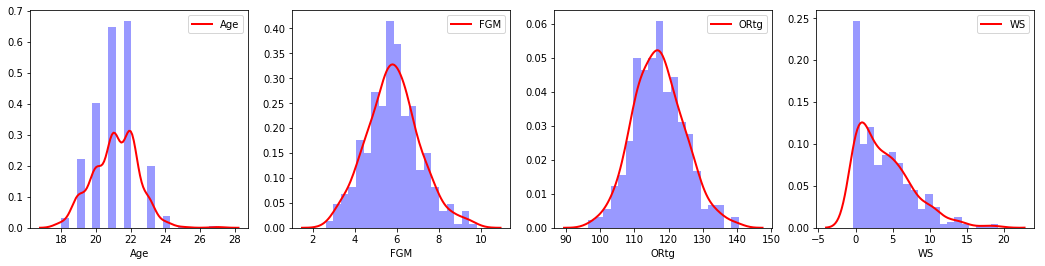

In [27]:
# EDA
# Histogram
feature = ['Age', 'FGM', 'ORtg', 'WS']
index = 0
plt.figure(figsize=(18,4))
for fea in feature:
    index += 1
    plt.subplot(1,4, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

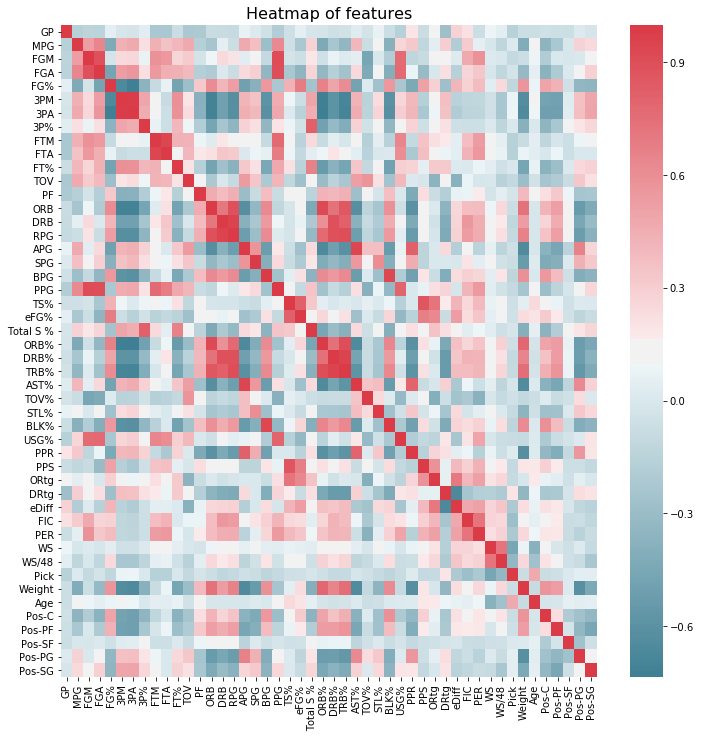

In [31]:
# Heatmap
fig = plt.figure(figsize = (12, 12))
plt.title("Heatmap of features", fontsize = 16)
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data.corr(), cmap = cmap)
plt.show()

In [52]:
data.iloc[0:5, 0:3]

,Player,Team_x,GP
0,Andre Roberson,CU,36
1,Lavoy Allen,TEM,33
2,Vernon Macklin,UF,37
3,Ryan Kelly,DUKE,31
4,Michael Kidd-Gilchrist,UK,40


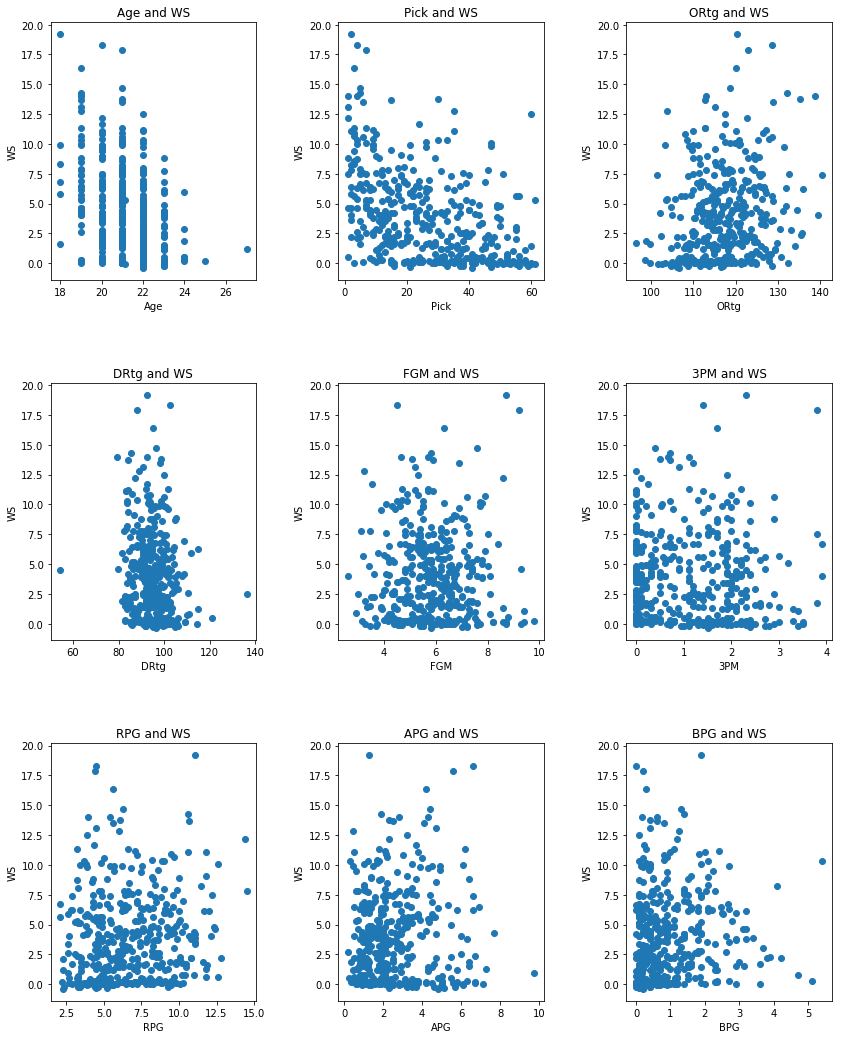

In [53]:
# scatter plots
features = ['Age', 'Pick', 'ORtg', 'DRtg', 'FGM', '3PM', 'RPG', 'APG', 'BPG']
plt.figure()
fig, axes = plt.subplots(3, 3, figsize = (14, 18))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(9):
    row, col = i // 3, i % 3
    axes[row][col].scatter(data[features[i]], data.WS)
    axes[row][col].set_title(features[i] + " and WS")
    axes[row][col].set_xlabel(features[i])
    axes[row][col].set_ylabel('WS')
plt.show()

In [206]:
# Model building
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'Pick', 
                     'FIC', 'PF', 'TOV', 'Total S %', 'eDiff'],1)
target = data['WS']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 43)

In [207]:
features_train.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
68,37,34.3,5.50,11.90,0.457,0.8,2.6,0.326,2.40,3.80,...,102.3,86.1,19.7,234.0,21.0,0.0,1.0,0.0,0.0,0.0
390,33,19.3,3.15,5.61,0.562,0.0,0.0,0.000,1.85,3.45,...,115.5,82.7,21.6,250.0,23.0,1.0,0.0,0.0,0.0,0.0
24,31,33.7,5.10,9.60,0.532,1.3,3.0,0.424,1.50,2.30,...,108.0,93.3,17.8,230.0,22.0,0.0,0.0,1.0,0.0,0.0
74,37,27.1,6.00,11.80,0.508,0.6,1.7,0.349,1.80,2.70,...,111.5,94.7,24.1,265.0,19.0,1.0,0.0,0.0,0.0,0.0
350,29,33.3,7.80,17.30,0.453,1.5,5.6,0.267,7.40,8.80,...,120.0,104.3,30.3,205.0,21.0,0.0,0.0,0.0,1.0,1.0


### method 1

In [208]:
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [209]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

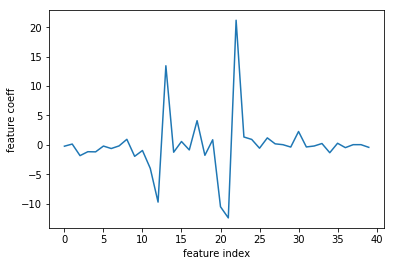

In [210]:
plt.plot(model_LR.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

### method 2

In [218]:
# Model building
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'Pick', 
                     'FIC', 'PF', 'TOV', 'Total S %', 'eDiff'],1)
target = data['WS']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 43)

In [219]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

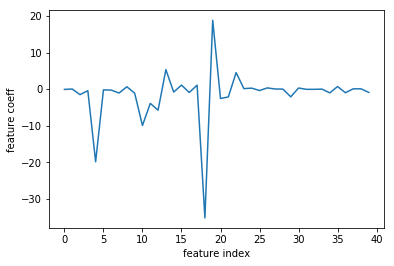

In [220]:
plt.plot(model_LR.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

### Ridge regression

In [221]:
from sklearn.linear_model import Ridge, Lasso
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

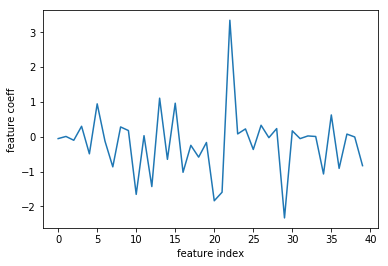

In [222]:
plt.plot(model_ridge.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

### Lasso

In [223]:
model_lasso = Lasso(alpha = 1.0)
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

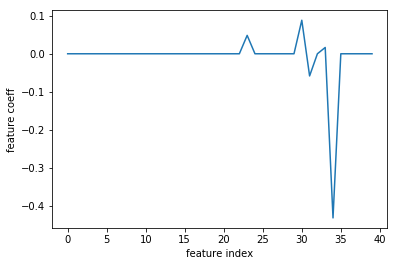

In [224]:
plt.plot(model_lasso.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

In [226]:
imp_features = features_train.columns.get_values()
imp_features

array(['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'PPG',
       'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%',
       'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'PER', 'Weight',
       'Age', 'Pos-C', 'Pos-PF', 'Pos-SF', 'Pos-PG', 'Pos-SG'],
      dtype=object)

In [249]:
imp_features = imp_features[(model_lasso.coef_ != 0)]

### cross validation

In [253]:
features_test[imp_features].head()

,AST%,ORtg,DRtg,Weight,Age
94,7.2,128.3,85.7,250.0,21.0
20,16.9,99.7,95.5,190.0,20.0
27,1.8,118.5,93.9,265.0,22.0
35,7.5,110.1,86.8,250.0,20.0
218,14.0,120.7,97.5,225.0,23.0


In [255]:
from sklearn.model_selection import cross_validate
scores_LR1 = cross_validate(model_LR, features_test[imp_features], target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_LR2 = cross_validate(model_LR, features_test[imp_features], target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR1['test_score']), np.sqrt(np.mean(-1*scores_LR2['test_score'])))

Cross-Validation score for Linear Regression:  2.817366809858886 3.5458467232252264


In [256]:
from sklearn.model_selection import cross_validate
scores_LR1 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_LR2 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR1['test_score']), np.sqrt(np.mean(-1*scores_LR2['test_score'])))

scores_ridge1 = cross_validate(model_ridge, features_test[imp_features], target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_ridge2 = cross_validate(model_ridge, features_test[imp_features], target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Ridge Regression: ", np.mean(-1*scores_ridge1['test_score']), np.sqrt(np.mean(-1*scores_ridge2['test_score'])))

scores_lasso1 = cross_validate(model_lasso, features_test[imp_features], target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_lasso2 = cross_validate(model_lasso, features_test[imp_features], target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Lasso Regression: ", np.mean(-1*scores_lasso1['test_score']), np.sqrt(np.mean(-1*scores_lasso2['test_score'])))

Cross-Validation score for Linear Regression:  3.3788536582970985 4.305715136169151
Cross-Validation score for Ridge Regression:  2.8164651095376403 3.545795422827077
Cross-Validation score for Lasso Regression:  2.8751432163762893 3.6776149023328824


In [232]:
prospects_df = pd.read_csv('2018_prospects.csv')

In [233]:
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.0
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.5
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,NaN
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.0
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.0


In [234]:
prospects_df['Wingspan_inches'] = prospects_df['Wingspan_inches'].fillna(prospects_df['Wingspan_inches'].mean())
prospects_df['PER'] = prospects_df['PER'].fillna(prospects_df['PER'].mean())

In [235]:
prospects_df.reset_index(drop=True)
prospects_df['Pos-C']=0.0
prospects_df['Pos-PF']=0.0
prospects_df['Pos-SF']=0.0
prospects_df['Pos-PG']=0.0
prospects_df['Pos-SG']=0.0
for i in range(len(prospects_df)):
    p = prospects_df.Pos.str.split("/")[i]
    prospects_df.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    prospects_df.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF'))*1.0
    prospects_df.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF'))*1.0
    prospects_df.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    prospects_df.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [236]:
pro_features = prospects_df.drop(['Player', 'Pre-Draft Team', 'Pos', 'Pick', 
                                  'Heightw/shoesinches', 'Wingspan_inches'], 1)

In [237]:
pro_features.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,35,33.5,7.9,12.9,0.612,0.3,1.0,0.343,4.0,5.5,...,130.3,97.5,30.6,250,19.6,1.0,0.0,0.0,0.0,0.0
1,33,33.9,8.2,13.3,0.614,0.7,1.8,0.397,4.0,6.3,...,128.1,97.5,28.3,225,18.9,1.0,1.0,0.0,0.0,0.0
2,49,24.7,4.7,10.4,0.456,1.5,4.9,0.304,4.1,5.1,...,124.2,106.2,25.4,220,19.0,0.0,0.0,0.0,1.0,0.0
3,35,21.8,3.4,6.6,0.513,1.1,2.7,0.396,3.0,3.8,...,120.7,85.8,25.1,225,18.4,1.0,1.0,0.0,0.0,0.0
4,30,30.2,4.9,9.0,0.541,0.5,1.7,0.275,2.7,4.0,...,118.4,88.4,26.4,216,19.8,1.0,0.0,0.0,0.0,0.0


In [238]:
scaler.transform(pro_features)

array([[ 0.36844499,  0.43864564,  1.74666074, ..., -0.61777222,
        -0.56927504, -0.68864127],
       [-0.26826358,  0.55251235,  1.99175599, ..., -0.61777222,
        -0.56927504, -0.68864127],
       [ 4.82540499, -2.06642208, -0.86768861, ..., -0.61777222,
         1.75662013, -0.68864127],
       ...,
       [ 0.68679928, -1.2408884 , -0.54089494, ..., -0.61777222,
        -0.56927504, -0.68864127],
       [ 1.32350785,  0.32477892, -0.78599019, ..., -0.61777222,
        -0.56927504,  1.45213486],
       [-0.90497215, -1.92408869, -2.01146645, ..., -0.61777222,
         1.75662013, -0.68864127]])

In [239]:
results = model_lasso.predict(pro_features)
prospects_df['WS'] = results
final = prospects_df[['Player', 'Pick', 'WS']]

In [240]:
final

,Player,Pick,WS
0,Deandre Ayton,1,5.769743
1,Marvin Bagley III,2,5.382701
2,Luka Doncic,3,5.527352
3,Jaren Jackson Jr.,4,5.666598
4,Mohamed Bamba,5,4.284852
5,Michael Porter Jr.,6,2.370495
6,Mikal Bridges,7,4.553121
7,Wendell Carter Jr.,8,6.164577
8,Collin Sexton,9,3.816676
9,Miles Bridges,10,4.711586


In [241]:
final.sort_values(['WS'],ascending=[False]).iloc[0:60,]

,Player,Pick,WS
7,Wendell Carter Jr.,8,6.164577
0,Deandre Ayton,1,5.769743
3,Jaren Jackson Jr.,4,5.666598
2,Luka Doncic,3,5.527352
84,Gary Clark,61,5.400570
1,Marvin Bagley III,2,5.382701
58,Jontay Porter,59,5.314292
17,Zhaire Smith,18,5.268891
9,Miles Bridges,10,4.711586
93,Isaac Haas,61,4.691489


In [245]:
ground = pd.read_csv('2018_NBA_Draft.csv', encoding="cp1252")
ground = ground[['Player','Pick']]
perf = pd.merge(ground, final, how='left', on='Player')

In [246]:
final_perf = perf.sort_values(['WS'], ascending=[False])

In [247]:
final_perf

,Player,Pick_x,Pick_y,WS
6,Wendell Carter Jr.,7,8.0,6.164577
0,Deandre Ayton,1,1.0,5.769743
3,Jaren Jackson Jr.,4,4.0,5.666598
2,Luka Doncic,3,3.0,5.527352
1,Marvin Bagley III,2,2.0,5.382701
15,Zhaire Smith,16,18.0,5.268891
11,Miles Bridges,12,10.0,4.711586
25,Landry Shamet,26,50.0,4.619385
32,Jalen Brunson,33,33.0,4.564891
9,Mikal Bridges,10,7.0,4.553121


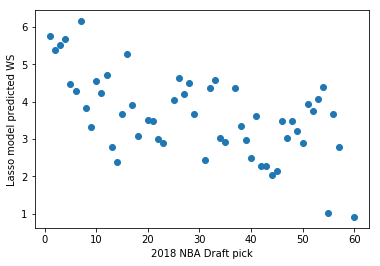

In [248]:
plt.scatter(final_perf.Pick_x, final_perf.WS)
plt.xlabel('2018 NBA Draft pick')
plt.ylabel('Lasso model predicted WS')
plt.show()